In [1]:
pip install tensorflow

In [2]:
pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.datasets import mnist

In [3]:
(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [4]:
digit=mnist.load_data()

In [5]:
dir(digit)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [6]:
print(train_data.shape)

(60000, 28, 28)


In [7]:
print(train_target.shape)

(60000,)


In [8]:
print(test_data.shape)

(10000, 28, 28)


In [9]:
print(test_target.shape)

(10000,)


In [10]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
print(train_target[0])

5


In [12]:
from matplotlib import pyplot as plt


In [13]:
plt.gray()

<Figure size 432x288 with 0 Axes>

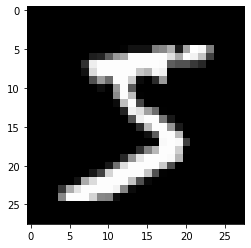

In [14]:
plt.imshow(train_data[0])
plt.show()

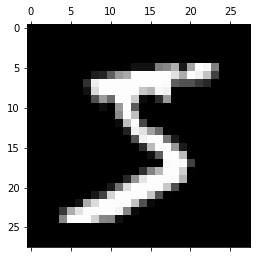

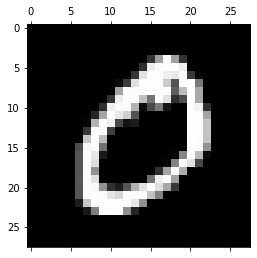

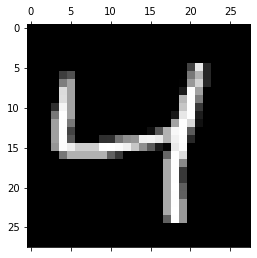

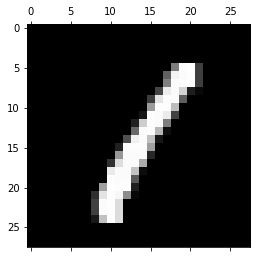

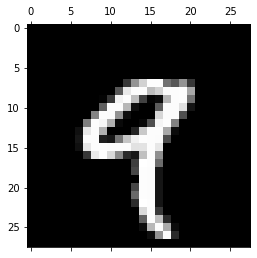

In [15]:
for i in range(0,5):
    plt.matshow(train_data[i])

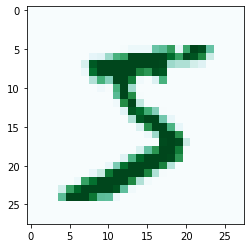

In [16]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='BuGn')
plt.show()

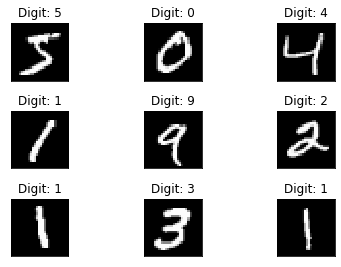

In [17]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_data[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(train_target[i]))
  plt.xticks([])
  plt.yticks([])

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [19]:
model=Sequential()

In [20]:
model.add(Flatten(input_shape=(28,28)))

In [21]:
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
__________________________________________________

In [23]:
from keras.utils import np_utils

In [24]:
new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

In [25]:
print(train_target[:10])
print(new_train_target[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [26]:
new_train_data=train_data/255
new_test_data=test_data/255

In [27]:
new_train_data[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
new_test_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [29]:
model.fit(new_train_data,new_train_target,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3616 - accuracy: 0.8891
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0942 - accuracy: 0.9710
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0411 - accuracy: 0.9874
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9919
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

for layer in model.layers[1]:
    print('*********************************')
    parameters=model.layers[1].get_weights()[0]
    weights=parameters
    parameter_b=model.layers[1].get_weights()[1]
    biases=parameter_b
    print('weights:',weights)

In [30]:
from matplotlib import pyplot as plt

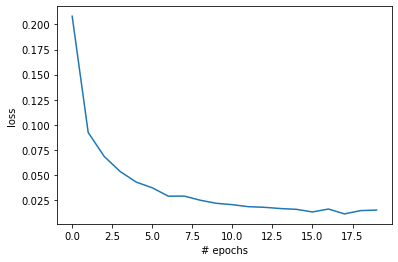

In [31]:
plt.plot(model.history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

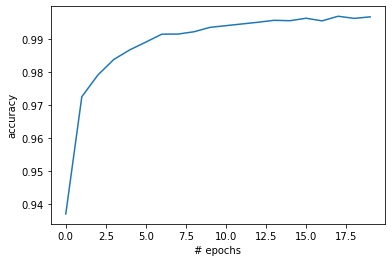

In [32]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.show()

In [33]:
model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.1320 - accuracy: 0.9787


[0.13204425573349, 0.9786999821662903]

predicted = model.predict(new_test_data)

print('Actual results:',new_test_target[1])
print('Predicted results:',predicted[1])

import numpy as np

print('Actual results:',np.argmax(new_test_target,axis=1))
print('Predicted results:',np.argmax(predicted,axis=1))

parameters=model.layers[1].get_weights()[0]
weights=parameters
parameter_b=model.layers[1].get_weights()[1]
biases=parameter_b

weights

biases

In [34]:
model.save('mnist.h5')